<a href="https://colab.research.google.com/github/joaogabrielanuto/quant-traders/blob/under-construction/detector-topos-fundos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---
# **Volume profile** 


#### Metodologia utilizando fechamentos e volume
---

# 1. Bibliotecas

In [ ]:
#%pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf

# 2. Obtenção dos dados

Obtenção de dados OHLC

In [146]:
df = TvDatafeed().get_hist(symbol='WIN1!', exchange='BMFBOVESPA', interval=Interval.in_1_minute, n_bars=10000)
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-04-10 09:00:00,BMFBOVESPA:WIN1!,101130.0,101205.0,101105.0,101200.0,17511.0
2023-04-10 09:01:00,BMFBOVESPA:WIN1!,101200.0,101205.0,101080.0,101100.0,28083.0
2023-04-10 09:02:00,BMFBOVESPA:WIN1!,101105.0,101190.0,101100.0,101160.0,23660.0
2023-04-10 09:03:00,BMFBOVESPA:WIN1!,101160.0,101210.0,101120.0,101140.0,22127.0
2023-04-10 09:04:00,BMFBOVESPA:WIN1!,101145.0,101160.0,101090.0,101100.0,17463.0
...,...,...,...,...,...,...
2023-04-27 17:51:00,BMFBOVESPA:WIN1!,104535.0,104555.0,104525.0,104540.0,2644.0
2023-04-27 17:52:00,BMFBOVESPA:WIN1!,104540.0,104545.0,104515.0,104525.0,1311.0
2023-04-27 17:53:00,BMFBOVESPA:WIN1!,104525.0,104535.0,104500.0,104510.0,2961.0


# 3. Construção das funções

intervalo_vol = np.round(0.001 * max(df['close']), 2)
intervalo_vol

In [147]:
intervalo_barras = 50
volprofile  = df['volume'].groupby(df['close'].apply(lambda x: intervalo_vol*round(x/intervalo_vol, 0))).sum()
volprofile

close
100850.0     34602.0
100900.0     86809.0
100950.0    151397.0
101000.0    226189.0
101050.0     31142.0
              ...   
110250.0    120314.0
110300.0    167572.0
110350.0     98492.0
110400.0    193035.0
110450.0     42194.0
Name: volume, Length: 186, dtype: float64

In [121]:
mc = mpf.make_marketcolors(base_mpf_style='yahoo')
s  = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=mc)

c:\Users\jamir\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




<BarContainer object of 186 artists>

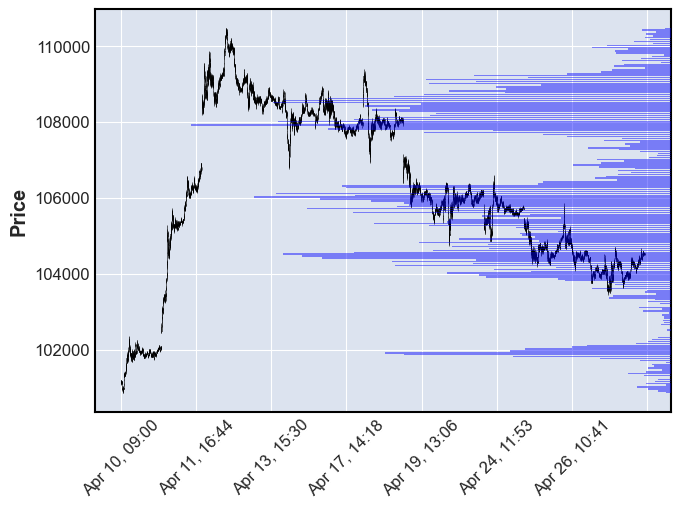

In [131]:
fig, axlist = mpf.plot(df, type='candle', returnfig=True)

vpax = fig.add_axes(axlist[0].get_position())
vpax.set_axis_off()
vpax.set_xlim(left=1.2*max(volprofile.values))
vpax.barh( volprofile.keys().values, volprofile.values, height=0.75*intervalo_barras, align='center', color='blue', alpha=0.45)

In [145]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-02-13 09:00:00,BMFBOVESPA:WIN1!,108175.0,108185.0,107795.0,107860.0,146778.0
2023-02-13 09:05:00,BMFBOVESPA:WIN1!,107860.0,107925.0,107775.0,107800.0,92070.0
2023-02-13 09:10:00,BMFBOVESPA:WIN1!,107800.0,107940.0,107745.0,107855.0,102674.0
2023-02-13 09:15:00,BMFBOVESPA:WIN1!,107860.0,107975.0,107820.0,107930.0,88141.0
2023-02-13 09:20:00,BMFBOVESPA:WIN1!,107925.0,108170.0,107925.0,108130.0,143759.0
...,...,...,...,...,...,...
2023-04-27 17:35:00,BMFBOVESPA:WIN1!,104585.0,104595.0,104470.0,104565.0,44574.0
2023-04-27 17:40:00,BMFBOVESPA:WIN1!,104565.0,104575.0,104505.0,104530.0,25270.0
2023-04-27 17:45:00,BMFBOVESPA:WIN1!,104525.0,104550.0,104500.0,104535.0,25960.0


In [155]:
df_2 = TvDatafeed().get_hist(symbol='WIN1!', exchange='BMFBOVESPA', interval=Interval.in_daily, n_bars=10000)
df_2 = df_2.loc[str(df.index[0].date()):]

<BarContainer object of 186 artists>

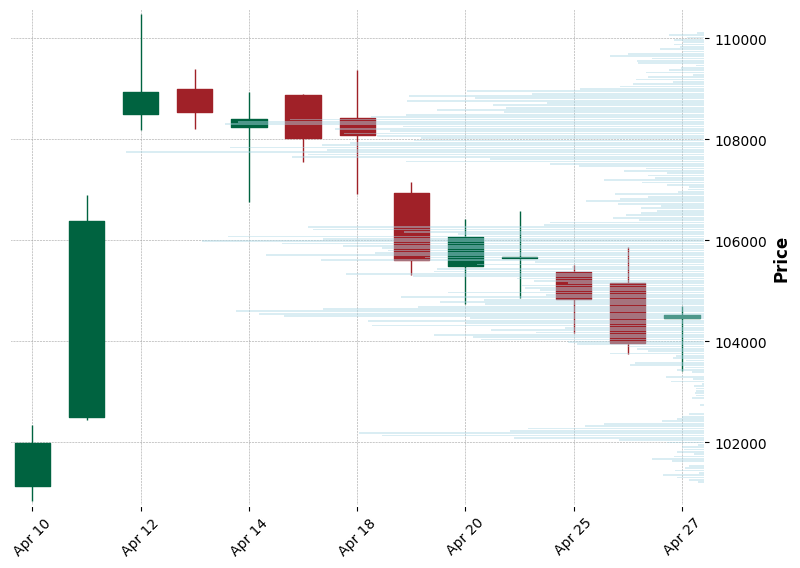

In [156]:
df_2 = TvDatafeed().get_hist(symbol='WIN1!', exchange='BMFBOVESPA', interval=Interval.in_daily, n_bars=10000)
df_2 = df_2.loc[str(df.index[0].date()):]

df_figure = df_2

fig, axlist = mpf.plot(df_figure, type='candle', style='charles', returnfig=True, tight_layout=True)

vpax = fig.add_axes(axlist[0].get_position())
vpax.set_axis_off()
vpax.set_xlim(left=1.2*max(volprofile.values))
vpax.barh(volprofile.keys().values, volprofile.values, height=0.75*intervalo_barras, align='center', color='lightblue', alpha=0.45)

c:\Users\jamir\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




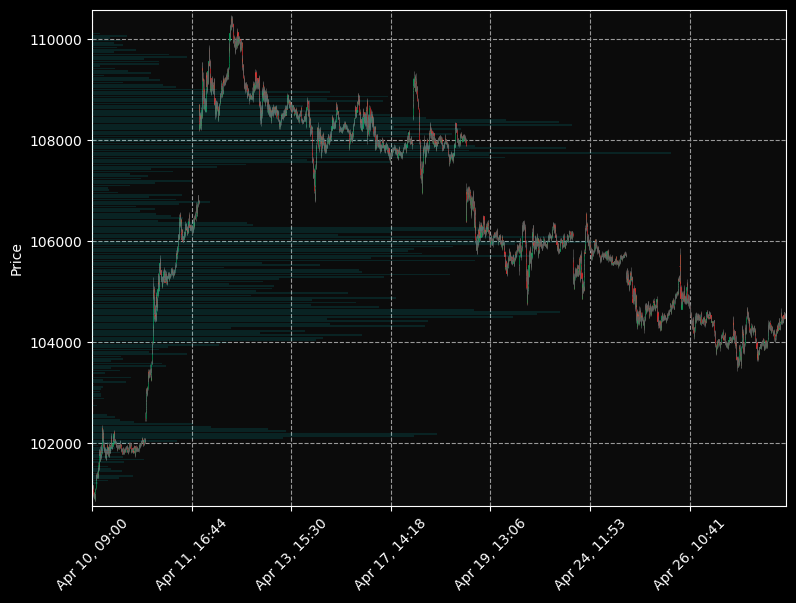

In [135]:
mc = mpf.make_marketcolors(base_mpf_style='yahoo')
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

fig, axlist = mpf.plot(df,type='candle',returnfig=True,style=s,tight_layout=True)

vpax = fig.add_axes(axlist[0].get_position())
vpax.set_axis_off()
vpax.set_xlim(right=1.2*max(volprofile.values))
vpax.barh( volprofile.keys().values, volprofile.values, height=0.75*intervalo_barras, align='center', color='cyan', alpha=0.1)

mpf.show()

    """
    create volume profile
    :param df: time-indexed HOLCV bar or time-indexed P-V tick
    :param price_pace: price bucket, default 5 cents
    :param return_raw: return raw data or figure
    :return: raw data or figure obj
    """

In [57]:
intervalo = 0.05
close_min = min(df.Close)
close_max = max(df.Close)
close_min_int = math.floor(close_min)
close_max_int = math.ceil(close_max)

intervalos_precos = np.arange(close_min_int, close_max_int, intervalo)
preco_central_barra = pd.Series(intervalos_precos).rolling(2).mean().dropna().values
volume_barras = np.histogram(df.Close, bins=intervalos_precos, weights=df.Volume)[0]
preco_central_barra

1      22.025
2      22.075
3      22.125
4      22.175
5      22.225
        ...  
115    27.725
116    27.775
117    27.825
118    27.875
119    27.925
Length: 119, dtype: float64

In [68]:
def volume_at_price(df, intervalo=0.05):

    close_min = min(df.Close)
    close_max = max(df.Close)
    close_min_int = math.floor(close_min)
    close_max_int = math.ceil(close_max)

    intervalos_precos = np.arange(close_min_int, close_max_int, intervalo)
    preco_central_barra = pd.Series(intervalos_precos).rolling(2).mean().dropna().values
    volume_barras = np.histogram(df.Close, bins=intervalos_precos, weights=df.Volume)[0]

    return (preco_central_barra, volume_barras)

In [71]:
preco_central_barra, volume_barras = volume_at_price(df)

In [76]:
px.histogram(x=volume_barras, y=preco_central_barra, nbins=len(preco_central_barra),  orientation='h').show()

In [84]:
fig_topos_fundos = go.Figure(data=[go.Candlestick(name='', x=df_figure.index, open=df_figure.Open, high = df_figure.High,
                                                  low=df_figure.Low, close=df_figure.Close, 
                                                  increasing_line_color= 'green', decreasing_line_color= 'red',
                                                  xaxis='x', yaxis='y2',
                                                  showlegend=False)])

fig_topos_fundos.add_trace(go.Bar(x=volume_barras, y=preco_central_barra,
                                    orientation='h',
                                    xaxis='x2',
                                    yaxis='y3',
                                    visible=True,
                                    showlegend=False,
                                    marker_color='blue',
                                    opacity=0.2,
                                ))

fig_topos_fundos

In [85]:
def volume_profile(df, price_pace=0.05, return_raw=False):
    """
    create volume profile
    :param df: time-indexed HOLCV bar or time-indexed P-V tick
    :param price_pace: price bucket, default 5 cents
    :param return_raw: return raw data or figure
    :return: raw data or figure obj
    """

    cmin = min(df.Close)
    cmax = max(df.Close)
    cmin_int = int(cmin / price_pace) * price_pace  # int(0.9) = 0
    cmax_int = int(cmax / price_pace) * price_pace
    if cmax_int < cmax:
        cmax_int += price_pace
    cmax_int += price_pace  # right bracket is not included in arrange

    price_buckets = np.arange(cmin_int, cmax_int, price_pace)
    price_coors = pd.Series(price_buckets).rolling(2).mean().dropna()
    vol_bars = np.histogram(df.Close, bins=price_buckets, weights=df.Volume)[0]

    if return_raw:
        return (price_coors.values, vol_bars)
    
    fig1 = go.Candlestick(
            x=df.index,
            open=df.Open,
            high=df.High,
            low=df.Low,
            close=df.Close,
            xaxis='x',
            yaxis='y2',
            visible=True,
            showlegend=False
        )
    fig3 = go.Bar(
        x=vol_bars,
        y=price_coors.values,
        orientation='h',
        xaxis='x2',
        yaxis='y3',
        visible=True,
        showlegend=False,
        marker_color='blue',
        opacity=0.2
    )

    low = cmin_int
    high = cmax_int
    layout = go.Layout(
        title=go.layout.Title(text="Volume Profile"),

        yaxis2=go.layout.YAxis(
            side="right",
            title='Price',
            range=[low, high],
            domain=[0.2, 1.0]
        ),
        xaxis2=go.layout.XAxis(
            side="top",
            showgrid=False,
            ticks='',
            showticklabels=False,
            range=[0, int(vol_bars.max() * 5)],
            overlaying="x"
        ),
        yaxis3=go.layout.YAxis(
            side="right",
            range=[low, high],
            showticklabels=False,
            overlaying="y2"
        ),
    )

    fig = go.Figure(data=[fig1, fig3], layout=layout)

    return fig

In [86]:
df.columns = df.columns.str.capitalize()
volume_profile(df, price_pace=0.05, return_raw=False)

In [ ]:
fig_topos_fundos = go.Figure(data=[go.Candlestick(name='', x=df_figure.index, open=df_figure.Open, high = df_figure.High,
                                                  low=df_figure.Low, close=df_figure.Close, 
                                                  increasing_line_color= 'green', decreasing_line_color= 'red',
                                                  showlegend=False)])

fig_topos_fundos.add_trace(go.Scatter(x=df_topos_fundos.data, y=df_topos_fundos.preco,
                                      mode="lines", line_width=2, line_dash="solid", line_color="black",
                                      name="Topos / Fundos", showlegend=True))

fig_topos_fundos.update_xaxes(rangebreaks=[
                              dict(bounds=["sat", "mon"])])

fig_topos_fundos.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Indicador topos e fundos',
                               template = 'none', margin=dict(l=75, r=75, t=75, b=75), 
                               paper_bgcolor="#f7f8fa",
                               width=1200,height=600)

In [8]:
df_figure = df

fig_volume_profile = go.Figure(data=[go.Candlestick(name='', x=df_figure.index, open=df_figure.open, high = df_figure.high,
                                                  low=df_figure.low, close=df_figure.close, 
                                                  increasing_line_color= 'green', decreasing_line_color= 'red',
                                                  showlegend=False)])

fig_volume_profile.add_trace(go.Histogram(y=df.close, x=))
fig_volume_profile.show()

In [ ]:

df_figure = dados_fig.loc['2023-01-20':'2023-01-21']

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Candlestick(name='BTC-USDT', x=df_figure.index, open=df_figure['Open'], high = df_figure['High'], 
                             low=df_figure['Low'], close=df_figure['Close']), row=1,col=1)

fig.add_trace(go.Scatter(name='MME_26p', x=df_figure.index, y=df_figure['MM_26'], marker_color='black'), row=1, col=1)
fig.add_trace(go.Scatter(name='MME_12p', x=df_figure.index, y=df_figure['MM_12'], marker_color='blue'), row=1, col=1)

fig.add_trace(go.Scatter(name='Linha MACD (26, 12)', x=df_figure.index, y=df_figure['macd_1D_yf'], marker_color='orange'), row=2, col=1)
fig.add_trace(go.Scatter(name='Linha sinal (9)', x=df_figure.index, y=df_figure['macd_1D_signal_yf'], marker_color='green'), row=2, col=1)
fig.add_trace(go.Bar(name='MACD Histograma', x=df_figure.index, y=df_figure['macd_1D_diff_MACD_sig_yf'], marker_color='brown'), row=2, col=1)

fig.add_hline(y=0, line_width=2, line_dash='solid', line_color="black", row=2, col=1)

#fig.update_xaxes(title_text="<b> Data",rangebreaks=[dict(bounds=["sat", "mon"])])
fig.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Candlesticks e MACD', xaxis2_title="<b> Data",
                  yaxis1_title="<b> Preço Bitcoin ($)", yaxis2_title="<b>MACD",
                  font=dict(family="Arial", size=15, color="black"), margin=dict(l=50, r=20, t=70, b=20),
                  template = 'simple_white', paper_bgcolor="#f7f8fa",
                  width=800, height=500)
fig.show()

In [ ]:
hist_data = [df.volume, tab_dinamica_DY['VIVT3']]
group_labels = ['PETR3', 'VIVT3']

fig_histo = ff.create_distplot(hist_data, group_labels, bin_size=[2.5,2.5], show_rug=False,
                         colors = ['red', 'blue'])

fig_histo.update_layout(title='', xaxis_title="<b>Dividend Yield %",
                yaxis_title="<b>Frequência", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=15,color="black"),
                margin=dict(l=50, r=20, t=20, b=20), template = 'simple_white', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.8,xanchor="left",x=0.75),
                width=600,height=400)

fig_histo.show()

In [3]:

px.histogram(data, x='volume', y='close', nbins=150, orientation='h').show()

[*********************100%***********************]  1 of 1 completed


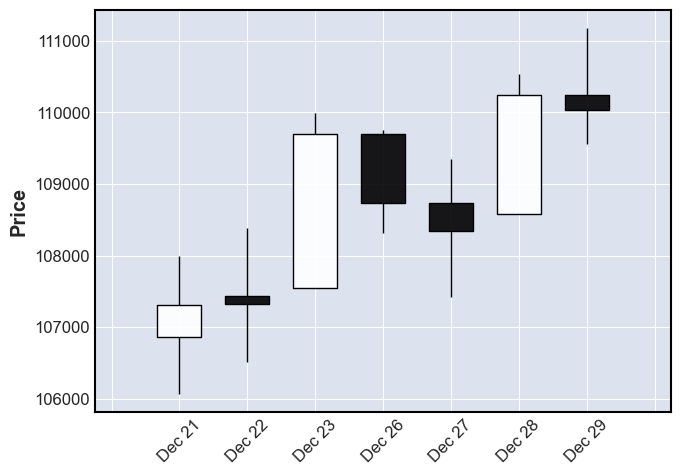

In [4]:
mpf.plot(df[-7:], type='candle')

In [5]:
def localizar_fundos(df, i, n_candles=2):
    
    df_invertido = df.iloc[::-1]

    fundo_pre = df['Low'][i] < df['Low'].rolling(n_candles, closed='left').min().iloc[i]
    fundo_post_invertido = df_invertido['Low'][-i-1] < df_invertido['Low'].rolling(n_candles, closed='left').min()
    fundo_post = fundo_post_invertido.iloc[::-1].iloc[i]
  
    return (fundo_pre and fundo_post)


def localizar_topos(df, i, n_candles=2):
    
    df_invertido = df.iloc[::-1]

    topo_pre = df['High'][i] > df['High'].rolling(n_candles, closed='left').max().iloc[i]
    topo_post_invertido = df_invertido['High'][-i-1] > df_invertido['High'].rolling(n_candles, closed='left').max()
    topo_post = topo_post_invertido.iloc[::-1].iloc[i]
  
    return (topo_pre and topo_post)

In [6]:
localizar_fundos(df, (len(df)-3))

True

In [7]:
localizar_topos(df, (len(df)-5))

True

In [8]:
n_candles = 3
ls_vertices = ['neutro']

dict_topos_fundos = {'vertice':[], 'data':[], 'preco':[]}


for i in range(len(df)):

    if localizar_fundos(df, i, n_candles):

        if (ls_vertices[-1]!='fundo'):
            
            if len(dict_topos_fundos['data'])==0:
                
                dict_topos_fundos['vertice'].append('fundo')
                dict_topos_fundos['data'].append(df.index[i])
                dict_topos_fundos['preco'].append(df.Low.iloc[i])
                ls_vertices.append('fundo')
            
            else:
                if df.Low.iloc[i] < dict_topos_fundos['preco'][-1]:
                    dict_topos_fundos['vertice'].append('fundo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.Low.iloc[i])
                    ls_vertices.append('fundo')
                
                elif df.Low.iloc[i] > dict_topos_fundos['preco'][-1]:
                    data_range = pd.date_range(start=dict_topos_fundos['data'][-1], end=df.index[i-1])
                    df_parcial = df[df.index.isin(data_range)]
                    df_parcial = df_parcial.sort_values('High', ascending=False)
                    dict_topos_fundos['data'][-1] = df_parcial.index[0]
                    dict_topos_fundos['preco'][-1] = df_parcial.High.iloc[0]
                    
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.Low.iloc[i])
                    ls_vertices.append('fundo')

        else:

            if df.Low.iloc[i] < dict_topos_fundos['preco'][-1]:
                dict_topos_fundos['data'][-1] = df.index[i]
                dict_topos_fundos['preco'][-1] = df.Low.iloc[i]


    if localizar_topos(df, i, n_candles):

        if ls_vertices[-1]!='topo':
            
            if len(dict_topos_fundos['data'])==0:
                
                dict_topos_fundos['vertice'].append('topo')
                dict_topos_fundos['data'].append(df.index[i])
                dict_topos_fundos['preco'].append(df.High.iloc[i])
                ls_vertices.append('topo')
            
            else:
                if df.High.iloc[i] > dict_topos_fundos['preco'][-1]:
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.High.iloc[i])
                    ls_vertices.append('topo')
                
                elif df.High.iloc[i] < dict_topos_fundos['preco'][-1]:
                    data_range = pd.date_range(start=dict_topos_fundos['data'][-1], end=df.index[i-1])
                    df_parcial = df[df.index.isin(data_range)]
                    df_parcial = df_parcial.sort_values('Low')
                    dict_topos_fundos['data'][-1] = df_parcial.index[0]
                    dict_topos_fundos['preco'][-1] = df_parcial.Low.iloc[0]
                    
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.High.iloc[i])
                    ls_vertices.append('topo')

        else:

            if df.High.iloc[i] > dict_topos_fundos['preco'][-1]:
                dict_topos_fundos['data'][-1] = df.index[i]
                dict_topos_fundos['preco'][-1] = df.High.iloc[i]


In [9]:
df_topos_fundos = pd.DataFrame(dict_topos_fundos)
df_topos_fundos.index = df_topos_fundos.data
df_topos_fundos.head(10)

,vertice,data,preco
data,,,
2022-01-24,fundo,2022-01-24,106624.0
2022-02-02,topo,2022-02-02,113666.0
2022-02-04,fundo,2022-02-04,110321.0
2022-02-16,topo,2022-02-16,115734.0
2022-02-24,fundo,2022-02-24,109125.0
2022-03-03,topo,2022-03-03,115948.0
2022-03-08,fundo,2022-03-08,110969.0
2022-03-11,topo,2022-03-11,114627.0
2022-03-15,fundo,2022-03-15,107781.0


In [10]:
df_final = pd.merge(df, df_topos_fundos, left_index=True, right_index=True, how='left')
df_final.head(20)

,Open,High,Low,Close,Adj Close,Volume,vertice,data,preco
Date,,,,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500,NaN,NaT,NaN
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600,NaN,NaT,NaN
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0,NaN,NaT,NaN
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200,NaN,NaT,NaN
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,NaN,NaT,NaN
2022-01-10,102719.0,102719.0,101038.0,101945.0,101945.0,10264700,NaN,NaT,NaN
2022-01-11,101946.0,103780.0,101918.0,103779.0,103779.0,12421500,NaN,NaT,NaN
2022-01-12,103779.0,105869.0,103771.0,105686.0,105686.0,13026500,NaN,NaT,NaN
2022-01-13,105686.0,106251.0,104974.0,105530.0,105530.0,11712300,NaN,NaT,NaN


In [14]:
tuples = list(df_topos_fundos[['data', 'preco']].itertuples(index=False))
tuples[0:5]

[Pandas(data=Timestamp('2022-01-24 00:00:00'), preco=106624.0),
 Pandas(data=Timestamp('2022-02-02 00:00:00'), preco=113666.0),
 Pandas(data=Timestamp('2022-02-04 00:00:00'), preco=110321.0),
 Pandas(data=Timestamp('2022-02-16 00:00:00'), preco=115734.0),
 Pandas(data=Timestamp('2022-02-24 00:00:00'), preco=109125.0)]

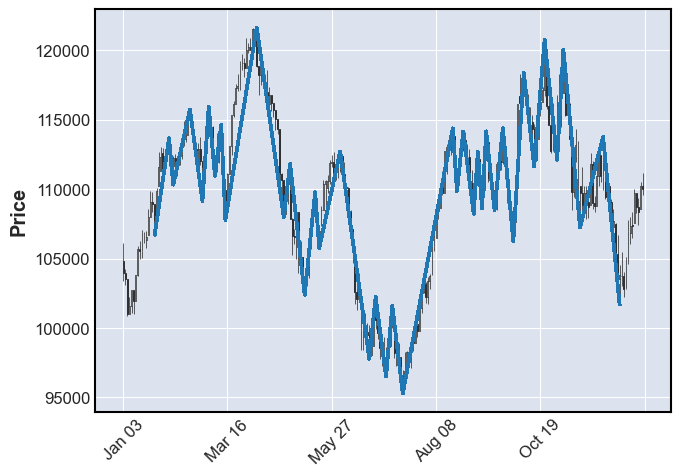

In [15]:
mpf.plot(df, type='candle', alines=(tuples))

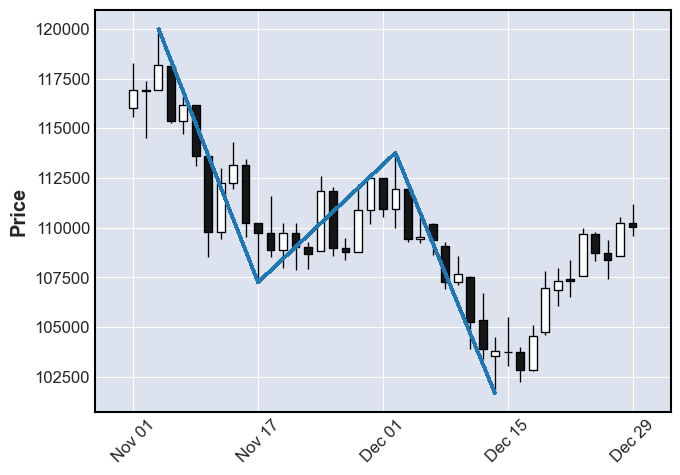

In [21]:
data_inicial = '2022-11-01'
df_topos_fundos_plot = df_topos_fundos[df_topos_fundos.data>=data_inicial]
tuples_plot = list(df_topos_fundos_plot[['data', 'preco']].itertuples(index=False))
mpf.plot(df.loc[data_inicial:], type='candle', alines=(tuples_plot))

In [22]:
df_figure = df_final

fig_topos_fundos = go.Figure(data=[go.Candlestick(name='', x=df_figure.index, open=df_figure.Open, high = df_figure.High,
                                                  low=df_figure.Low, close=df_figure.Close, 
                                                  increasing_line_color= 'green', decreasing_line_color= 'red',
                                                  showlegend=False)])

fig_topos_fundos.add_trace(go.Scatter(x=df_topos_fundos.data, y=df_topos_fundos.preco,
                                      mode="lines", line_width=2, line_dash="solid", line_color="black",
                                      name="Topos / Fundos", showlegend=True))

fig_topos_fundos.update_xaxes(rangebreaks=[
                              dict(bounds=["sat", "mon"])])

fig_topos_fundos.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Indicador topos e fundos',
                               template = 'none', margin=dict(l=75, r=75, t=75, b=75), 
                               paper_bgcolor="#f7f8fa",
                               width=1200,height=600)

## 4. Visualizações rápidas

In [23]:
df = yf.download('^BVSP', start='2022-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [24]:
def localizar_fundos(df, i, n_candles=2):
    
    df_invertido = df.iloc[::-1]

    fundo_pre = df['Low'][i] < df['Low'].rolling(n_candles, closed='left').min().iloc[i]
    fundo_post_invertido = df_invertido['Low'][-i-1] < df_invertido['Low'].rolling(n_candles, closed='left').min()
    fundo_post = fundo_post_invertido.iloc[::-1].iloc[i]
  
    return (fundo_pre and fundo_post)


def localizar_topos(df, i, n_candles=2):
    
    df_invertido = df.iloc[::-1]

    topo_pre = df['High'][i] > df['High'].rolling(n_candles, closed='left').max().iloc[i]
    topo_post_invertido = df_invertido['High'][-i-1] > df_invertido['High'].rolling(n_candles, closed='left').max()
    topo_post = topo_post_invertido.iloc[::-1].iloc[i]
  
    return (topo_pre and topo_post)

n_candles = 2
ls_vertices = ['neutro']

dict_topos_fundos = {'vertice':[], 'data':[], 'preco':[]}


for i in range(len(df)):

    if localizar_fundos(df, i, n_candles):

        if (ls_vertices[-1]!='fundo'):
            
            if len(dict_topos_fundos['data'])==0:
                
                dict_topos_fundos['vertice'].append('fundo')
                dict_topos_fundos['data'].append(df.index[i])
                dict_topos_fundos['preco'].append(df.Low.iloc[i])
                ls_vertices.append('fundo')
            
            else:
                if df.Low.iloc[i] < dict_topos_fundos['preco'][-1]:
                    dict_topos_fundos['vertice'].append('fundo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.Low.iloc[i])
                    ls_vertices.append('fundo')
                
                elif df.Low.iloc[i] > dict_topos_fundos['preco'][-1]:
                    data_range = pd.date_range(start=dict_topos_fundos['data'][-1], end=df.index[i-1])
                    df_parcial = df[df.index.isin(data_range)]
                    df_parcial = df_parcial.sort_values('High', ascending=False)
                    dict_topos_fundos['data'][-1] = df_parcial.index[0]
                    dict_topos_fundos['preco'][-1] = df_parcial.High.iloc[0]
                    
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.Low.iloc[i])
                    ls_vertices.append('fundo')

        else:

            if df.Low.iloc[i] < dict_topos_fundos['preco'][-1]:
                dict_topos_fundos['data'][-1] = df.index[i]
                dict_topos_fundos['preco'][-1] = df.Low.iloc[i]


    if localizar_topos(df, i, n_candles):

        if ls_vertices[-1]!='topo':
            
            if len(dict_topos_fundos['data'])==0:
                
                dict_topos_fundos['vertice'].append('topo')
                dict_topos_fundos['data'].append(df.index[i])
                dict_topos_fundos['preco'].append(df.High.iloc[i])
                ls_vertices.append('topo')
            
            else:
                if df.High.iloc[i] > dict_topos_fundos['preco'][-1]:
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.High.iloc[i])
                    ls_vertices.append('topo')
                
                elif df.High.iloc[i] < dict_topos_fundos['preco'][-1]:
                    data_range = pd.date_range(start=dict_topos_fundos['data'][-1], end=df.index[i-1])
                    df_parcial = df[df.index.isin(data_range)]
                    df_parcial = df_parcial.sort_values('Low')
                    dict_topos_fundos['data'][-1] = df_parcial.index[0]
                    dict_topos_fundos['preco'][-1] = df_parcial.Low.iloc[0]
                    
                    dict_topos_fundos['vertice'].append('topo')
                    dict_topos_fundos['data'].append(df.index[i])
                    dict_topos_fundos['preco'].append(df.High.iloc[i])
                    ls_vertices.append('topo')

        else:

            if df.High.iloc[i] > dict_topos_fundos['preco'][-1]:
                dict_topos_fundos['data'][-1] = df.index[i]
                dict_topos_fundos['preco'][-1] = df.High.iloc[i]

df_topos_fundos = pd.DataFrame(dict_topos_fundos)
df_topos_fundos.index = df_topos_fundos.data

df_final = pd.merge(df, df_topos_fundos, left_index=True, right_index=True, how='left')


df_figure = df_final

fig_topos_fundos = go.Figure(data=[go.Candlestick(name='', x=df_figure.index, open=df_figure.Open, high = df_figure.High,
                                                  low=df_figure.Low, close=df_figure.Close, 
                                                  increasing_line_color= 'green', decreasing_line_color= 'red',
                                                  showlegend=False)])

fig_topos_fundos.add_trace(go.Scatter(x=df_topos_fundos.data, y=df_topos_fundos.preco,
                                      mode="lines", line_width=2, line_dash="solid", line_color="black",
                                      name="Topos / Fundos", showlegend=True))

fig_topos_fundos.update_xaxes(rangebreaks=[
                              dict(bounds=["sat", "mon"])])

fig_topos_fundos.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Indicador topos e fundos',
                               template = 'none', margin=dict(l=75, r=75, t=75, b=75), 
                               paper_bgcolor="#f7f8fa",
                               width=1200,height=600)